## Bidirectional Encoder Representations from Transformers (BERT)
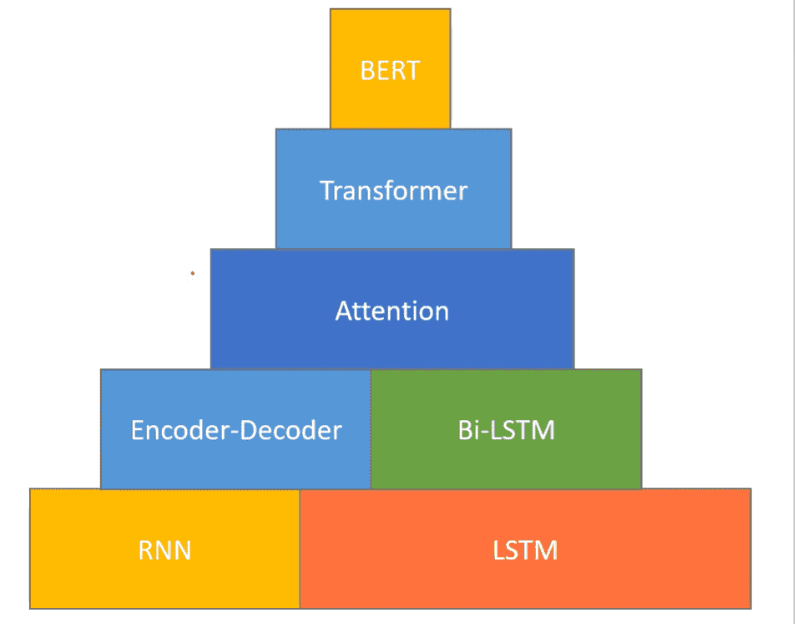

BERT models are built on **transformer** and **attention** architectures.
1. Transformer:
    - The transformer is built on **encoder-decoder** and **attention** mechanisms and consists of N encoder-decoders working in **parallel** with each other. The encoder first converts the input sentence to word embeddings and processes it to be predicted by the decoder and sends it to the decoder side. The data sent by the encoder is predicted by the decoder according to the type of problem.
    - Transformers work in parallel with each other to eliminate both the model's running speed and the model's forgetting problems, instead of working in a serial way like LSTM and GRU models.

2. Attention:
    - The attention mechanism (called self-attention) is the mechanism that decides which tokens to focus on by detecting all the contextual relationships among all tokens on which the model is trained, by means of the query, key, and values vectors created by the model.
    - Attention mechanism works on query, key, and  value vectors. Query refers to any word, key refers to the words that are most contextually related to this word(query), and value refers to the most related word selected by the model among the related words.
    - The **Multi-Head** attention mechanism tries to better capture the semantic bonds between words by doing this process many times in different ways. The train cost will be reduced as the model concentrates on weighted important words instead of all words.
    
Key Difference Between Transformer Models and GRU Models:
- Transformers work in parallel with each other to eliminate both the model's running speed and the model's forgetting problems, instead of working in a serial way like LSTM and GRU models.

Working Logic of Transformer:
- Although LSTM and GRU models eliminate forgetting problems compared to classic RNN models, unfortunately , LSTM and GRU are also insufficient in very long sentences. In order to prevent this forgetting, the transformer model's attention mechanism sends not only the last hidden layer as in RNN models but all hidden layers to the decoder. In this way, the importance of the first word in the sentence is preserved, as in the last words, and information integrity is ensured.

### BERT
- BERT was introduced by Google in 2018. We currently have two variants available:
    - **BERT Base:** 12 layesr(transformer blocks), 12 attention heads, and 110 million parameters,
    - **BERT Large:** 24 layers(transformer blocks), 16 attention heads, and 340 million paramters.


- BERT was trained in 4 days on very powerful machines on the BookCorpus, which has 800 million vocabularies, and Wikipedia, which has 2.5 billion vocabularies.


- BERT is trained with two techniques called **Masked Language Modeling (MLM)** and **Next Sentence Prediction (NSP)**, apart from being bidirectional.

    - **MLM:** In the first technique, when a sentence enters the model, the MLM technique is used in 15% of the words in the sentence. 80% of the words in which this technique is used are replaced with the [MASK] token, 10% are replaced with another random word, and the remaining 10% are left unchanged. If you ask how the 15% value is chosen, it is stated that masking too many words makes education very difficult, and masking too few words causes the content of the sentence to not be understood very well.
    - **NSP:** In the first technique, the model is trained based on the relationships between the words, while in the second technique, it is tried to guess whether the second sentence is a continuation of the first sentence with the sentence pairs given to the model. While 50% of the 2nd sentences in all sentence pairs are replaced with other sentences, 50% remain as they are. With these two Tecniques, the model understands the semantic relationships between words and sentences much better, and naturally, our results improve significantly.
    
    
- BERT use bidirectional transformer (both left-to-right and right-to-left direction) rather than unidirectional transformer (left-to-right direction). The fact that BERT gives such a succesful results is due to the **bidirectional transformer**. 


- BERT can be used for **Machine Translation**, **Question Answering**, **text and token classification**.

### Preparing the Data for The BERT Model

- In BERT models, the maximum length of sentences is **512 tokens** and each token is represented as a **768-dimensional vector** (BERT-Base), **1024-dimensional vector** (BERT-Large). 


- All inputs given to BERT models must be of fixed length, as with RNNs. All sentences are fixed to the user-specified length by padding and truncation in the tokenization phase.


- The tokenization in BERT is done using a method called **WordPiece** tokenization. The WordPiece tokenization process applied in BERT models is different from the classic tokenization processes we know. In this method, tokens are tokenized seperately according to their origin and attachment. 
    - For example, strawberry is expressed as two different tokens (straw and #berry) as root and suffixes.


- In BERT models; The input must be given to the model with a tensor consisting of token, segment, and position embeddings vectors. Otherwise, the model will not work. We can express the tensor as a set of vectors and matrices. 


#### Token Embeddings(input_ids):

- Our input sentence must go through the tokenization process before it reaches the token embedding layer. In the tokenization process, all inputs are fixed to the same length, and the CLS token, which indicates the beginning of a sentence, and the SEP token, which indicates the end of the sentence, is added to the beginning and end of the sentence. In this way, the model can detect the beginning and end of the sentence.


- After the tokenization process is completed, all tokens coming to the token embedding layer are converted into 768-dimensional vectors in the 30,522 token reservoirs of the BERT model.

#### Segment Embeddings (token_type_ids):

- For detecting the semantic similarities of two different sentences or tokens, translating a sentence or predicting the next sentence, etc. segment embedding layer is used. It is not used for text and token classification. 


- These two seperate sentences or tokens are given to the model in a combined form. The first sentence/token is represented by 0's and the second sentence/token by 1's.

#### Position Embeddings (attention_mask):

- We have stated that all input sentences given to BERT models must be of the same size. This length needs to be specified when building the model. For example, let's say the fixed length for the whole model is 100 and our first sentence is "CLS I like cats SEP". Position embedding layer; it will assing 1 to the "CLS", "I", "like", "cats" and "SEP" tokens while filling the remaining 95 tokens with PAD tokens, ie 0s. In this way, the model will have the actual length information of all sentences and will not do anything to the 0s.

